In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2.robjects as robjects
import rpy2.robjects.pandas2ri as pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr, isinstalled
import rpy2.robjects.packages as rpackages
from rpy2.robjects import r
import sys

import sys
sys.path.insert(0, '/Users/alanma/Documents/CFA_python')
import faircause.faircause as faircause
import faircause.fairprediction as fairprediction


In [2]:
# import
base = importr('base')
faircause = importr('faircause')

# Load census dataset
data = robjects.r('''
    get(data("compas", package = "faircause"))

''')

# Convert to pd
with localconverter(robjects.default_converter + pandas2ri.converter):
  data = robjects.conversion.rpy2py(data)
data.reset_index(drop=True, inplace=True)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [3]:
data.head()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid
0,Male,69,Non-White,0,0,0,0,F,0
1,Male,34,Non-White,0,0,0,0,F,1
2,Male,24,Non-White,0,0,1,4,F,1
3,Male,23,Non-White,0,1,0,1,F,0
4,Male,43,Non-White,0,0,0,2,F,0


In [4]:
# one hot
data['sex'] = (data['sex'] != 'Male').astype(int)
data['race'] = (data['race'] != 'White').astype(int)
data['c_charge_degree'] = (data['c_charge_degree'] != 'M').astype(int)

In [5]:
X = "race"
W = ["juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count",
        "c_charge_degree"]
Z = ["age", "sex"]
Y = "two_year_recid"
x0 = 0
x1 = 1

In [6]:
import faircause.fairprediction as fairprediction
fair_pred = fairprediction.FairPredict(data, X, Z, W, Y, 
                                       x0=x0, x1=x1, BN=["IE"])


In [7]:
fair_pred.train()

/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in div

4.6 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): 0.0847

TV decomposition(s):

TV_01(y) (0.0847) = NDE_01(y) (0.0497) - NIE_10(y) (0.0142) + ExpSE_1(y) (0.0352) - ExpSE_0(y) (-0.0139)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encounter

6.98 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): 0.0862

TV decomposition(s):

TV_01(y) (0.0862) = NDE_01(y) (-0.0063) - NIE_10(y) (-0.0538) + ExpSE_1(y) (0.0313) - ExpSE_0(y) (-0.0074)


/Users/alanma/Documents/CFA_python/faircause/utils/prediction_helpers.py:47: RuntimeWarning: divide by zero encountered in log
  ret = -np.mean(y * np.log(p_safe) + (1 - y) * np.log(1 - p_safe))
/Users/alanma/Documents/CFA_python/faircause/utils/prediction_helpers.py:47: RuntimeWarning: invalid value encountered in multiply
  ret = -np.mean(y * np.log(p_safe) + (1 - y) * np.log(1 - p_safe))
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z

6.98 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): 0.0654

TV decomposition(s):

TV_01(y) (0.0654) = NDE_01(y) (0.0007) - NIE_10(y) (-0.0425) + ExpSE_1(y) (0.0260) - ExpSE_0(y) (0.0038)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encounter

6.98 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): 0.0333

TV decomposition(s):

TV_01(y) (0.0333) = NDE_01(y) (0.0043) - NIE_10(y) (-0.0485) + ExpSE_1(y) (-0.0094) - ExpSE_0(y) (0.0101)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encounter

6.98 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): 0.0007

TV decomposition(s):

TV_01(y) (0.0007) = NDE_01(y) (0.0049) - NIE_10(y) (-0.0055) + ExpSE_1(y) (-0.0084) - ExpSE_0(y) (0.0012)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encounter

6.98 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): -0.0133

TV decomposition(s):

TV_01(y) (-0.0133) = NDE_01(y) (-0.0018) - NIE_10(y) (0.0130) + ExpSE_1(y) (-0.0019) - ExpSE_0(y) (-0.0034)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encounter

6.98 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): -0.0138

TV decomposition(s):

TV_01(y) (-0.0138) = NDE_01(y) (-0.0017) - NIE_10(y) (0.0135) + ExpSE_1(y) (-0.0016) - ExpSE_0(y) (-0.0030)


In [8]:
preds = fair_pred.predict(data)

/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


4.31 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): -0.0138

TV decomposition(s):

TV_01(y) (-0.0138) = NDE_01(y) (-0.0001) - NIE_10(y) (0.0132) + ExpSE_1(y) (-0.0007) - ExpSE_0(y) (-0.0002)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divi

4.74 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): -0.0138

TV decomposition(s):

TV_01(y) (-0.0138) = NDE_01(y) (0.0006) - NIE_10(y) (0.0136) + ExpSE_1(y) (-0.0007) - ExpSE_0(y) (0.0001)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


4.27 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): -0.0139

TV decomposition(s):

TV_01(y) (-0.0139) = NDE_01(y) (0.0000) - NIE_10(y) (0.0137) + ExpSE_1(y) (-0.0007) - ExpSE_0(y) (-0.0005)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in di

4.51 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): -0.0138

TV decomposition(s):

TV_01(y) (-0.0138) = NDE_01(y) (0.0000) - NIE_10(y) (0.0134) + ExpSE_1(y) (-0.0011) - ExpSE_0(y) (-0.0007)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


4.56 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): -0.0138

TV decomposition(s):

TV_01(y) (-0.0138) = NDE_01(y) (0.0005) - NIE_10(y) (0.0142) + ExpSE_1(y) (-0.0009) - ExpSE_0(y) (-0.0008)


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


4.44 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues
faircause object summary:

Protected attribute:                 race
Protected attribute levels:          0, 1
Total Variation (TV): -0.0137

TV decomposition(s):

TV_01(y) (-0.0137) = NDE_01(y) (0.0001) - NIE_10(y) (0.0128) + ExpSE_1(y) (-0.0011) - ExpSE_0(y) (-0.0000)


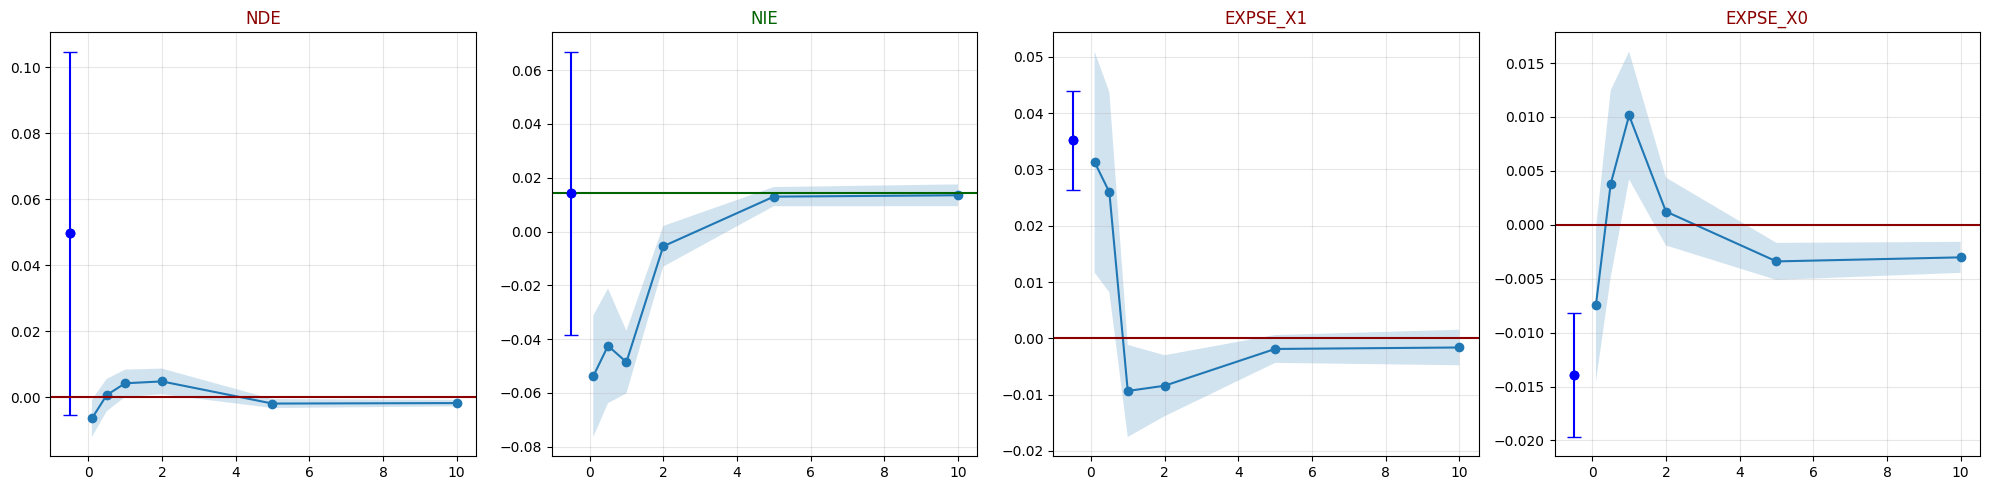

In [11]:
fair_pred.plot(type="causal")

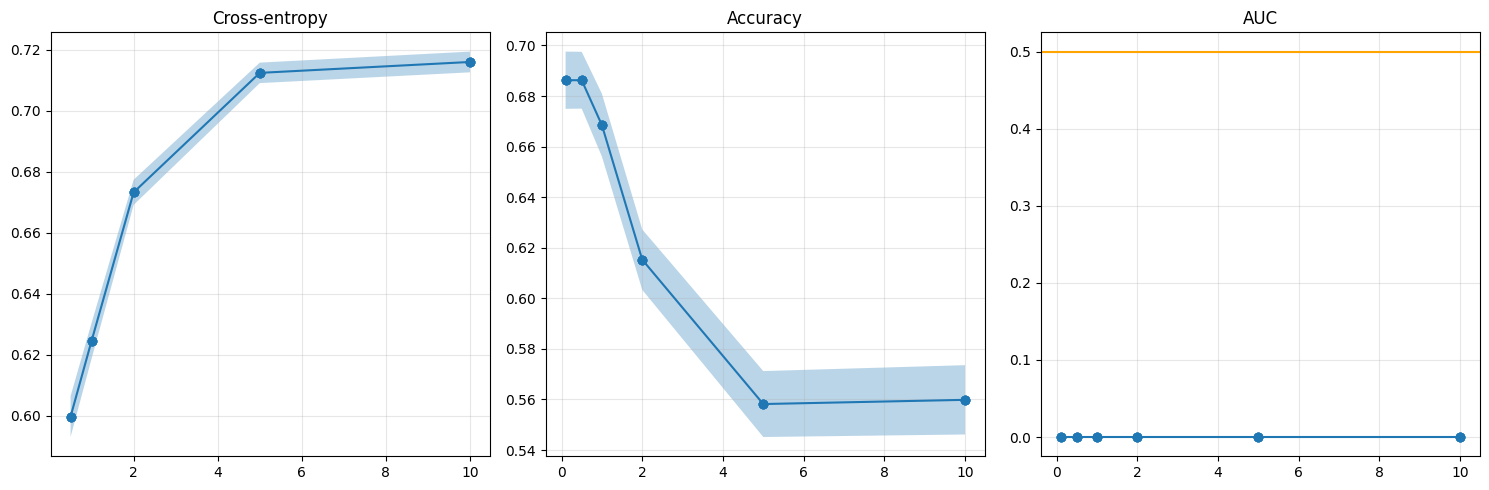

In [12]:
fair_pred.plot(type='accuracy')